# Heart Disease Prediction For Dataset 2(cardiovascular disease dataset)

## 1.Importing Libraries

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!python your_script.py


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import joblib 

python: can't open file 'c:\\Users\\KIIT\\OneDrive\\Desktop\\ML\\your_script.py': [Errno 2] No such file or directory


## 2.Load The Dataset

In [2]:
# Load and Sample Dataset (300 Records)
df = pd.read_csv("cardio_train.csv", sep=";") 
df = df.sample(n=300, random_state=42).reset_index(drop=True)  # Select 300 random records

In [3]:
# Remove 'id' column
df.drop(columns=['id'], inplace=True)

## 3.Exploratory Data Analysis

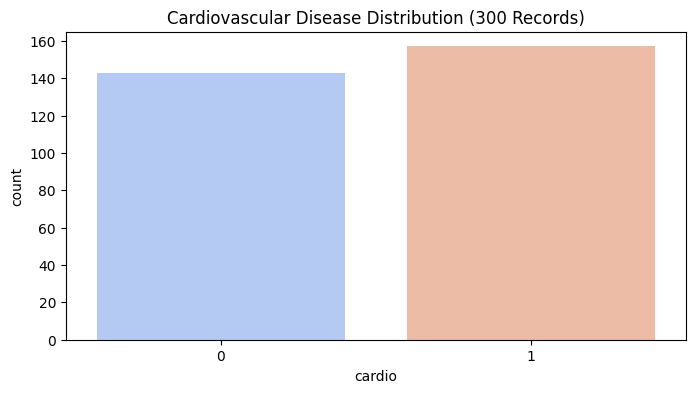

In [4]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,4))
sns.countplot(x='cardio', data=df, palette='coolwarm')
plt.title("Cardiovascular Disease Distribution (300 Records)")
plt.show()


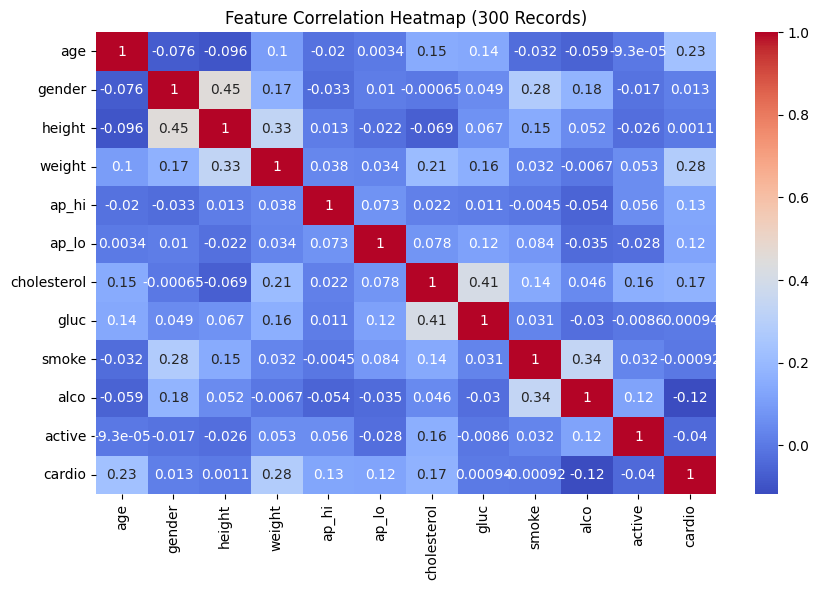

In [5]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (300 Records)")
plt.show()

##  4.Data Preprocessing

In [6]:
# Data Preprocessing
X = df.drop(columns=['cardio'])  # Features
y = df['cardio']  # Target variable

In [7]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


## 5.Apply PCA for Feature Reduction

In [9]:
pca = PCA(n_components=5)  # Reduce to 5 components for small dataset
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


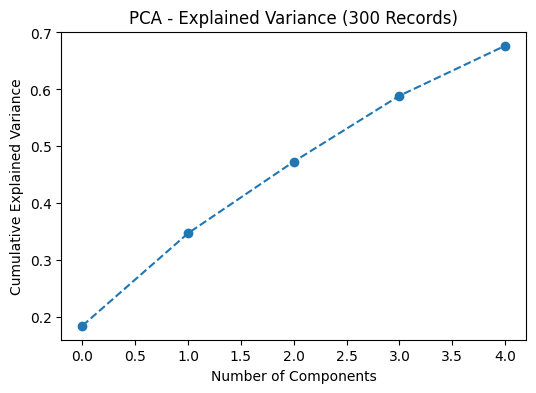

In [10]:
# Explained variance plot
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance (300 Records)")
plt.show()

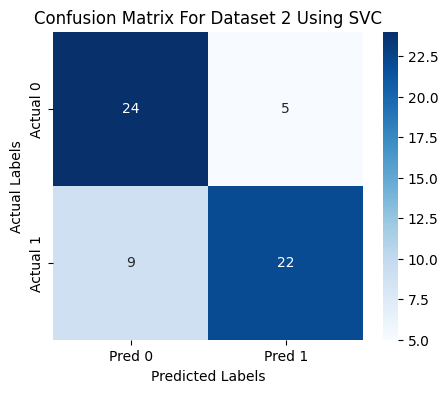

In [11]:
# create confusion matrix
model= SVC(kernel='rbf', probability=True)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix For Dataset 2 Using SVC")
plt.show()

## 6.Train The Models

In [12]:
# Train Multiple ML Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Naive Baye's":GaussianNB(),
    "Artificial Neural Network": MLPClassifier(hidden_layer_sizes=(32,16), max_iter=300, activation='relu', solver='adam', random_state=42)
}


Logistic Regression Performance:
Accuracy: 0.7166666666666667
Precision: 0.71875
Recall: 0.7419354838709677
F1 Score: 0.7301587301587301
ROC AUC: 0.7157953281423804

Confusion Matrix:
 [[20  9]
 [ 8 23]]


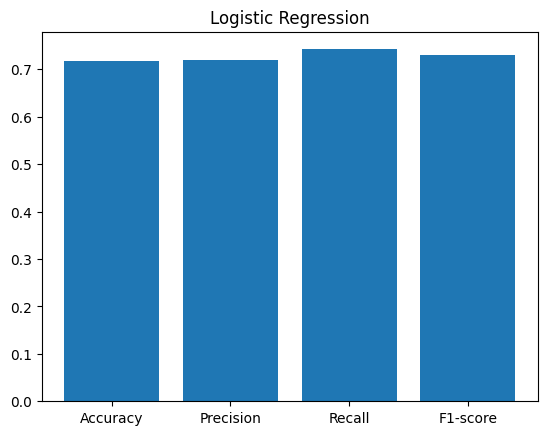


Support Vector Machine Performance:
Accuracy: 0.7166666666666667
Precision: 0.7058823529411765
Recall: 0.7741935483870968
F1 Score: 0.7384615384615385
ROC AUC: 0.7146829810901001

Confusion Matrix:
 [[19 10]
 [ 7 24]]


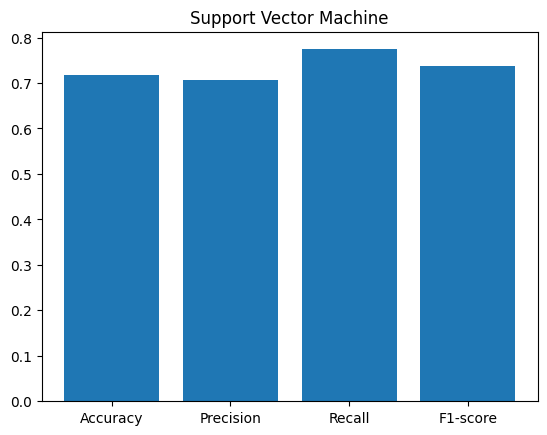


Random Forest Performance:
Accuracy: 0.7
Precision: 0.7241379310344828
Recall: 0.6774193548387096
F1 Score: 0.7
ROC AUC: 0.7007786429365962

Confusion Matrix:
 [[21  8]
 [10 21]]


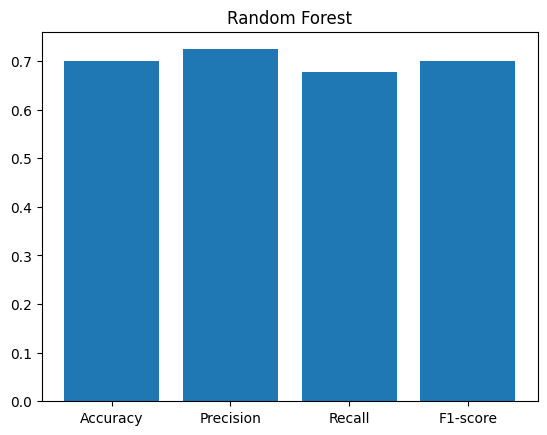


XGBoost Performance:
Accuracy: 0.6833333333333333
Precision: 0.6875
Recall: 0.7096774193548387
F1 Score: 0.6984126984126984
ROC AUC: 0.6824249165739711

Confusion Matrix:
 [[19 10]
 [ 9 22]]


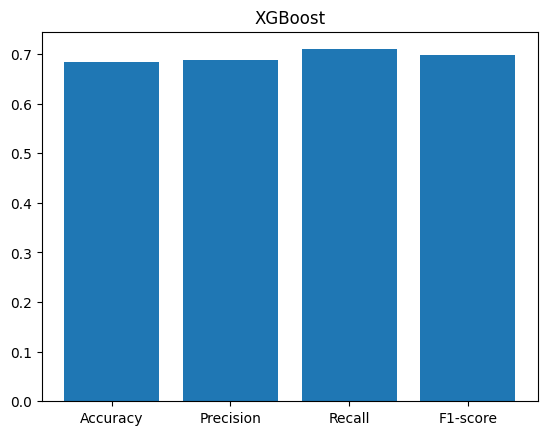


KNN Performance:
Accuracy: 0.6333333333333333
Precision: 0.6666666666666666
Recall: 0.5806451612903226
F1 Score: 0.6206896551724138
ROC AUC: 0.6351501668520578

Confusion Matrix:
 [[20  9]
 [13 18]]


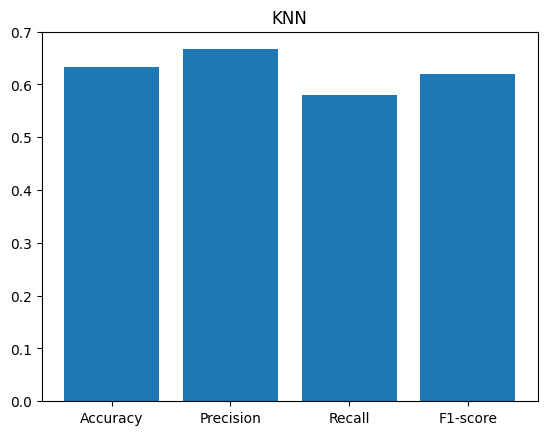


Decision Tree Performance:
Accuracy: 0.5833333333333334
Precision: 0.6071428571428571
Recall: 0.5483870967741935
F1 Score: 0.576271186440678
ROC AUC: 0.5845383759733036

Confusion Matrix:
 [[18 11]
 [14 17]]


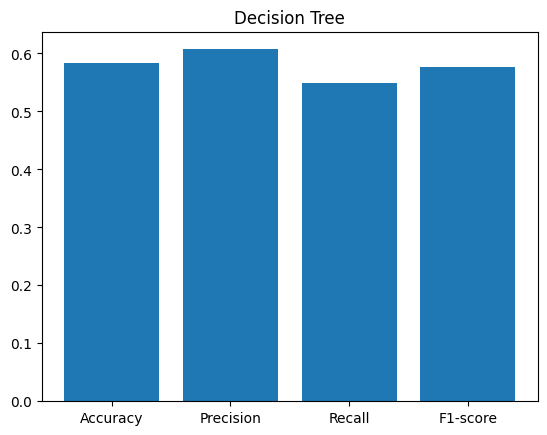


Naive Baye's Performance:
Accuracy: 0.5333333333333333
Precision: 0.5283018867924528
Recall: 0.9032258064516129
F1 Score: 0.6666666666666666
ROC AUC: 0.5205784204671858

Confusion Matrix:
 [[ 4 25]
 [ 3 28]]


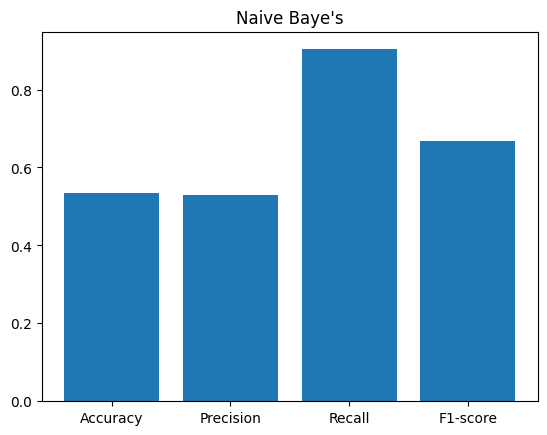


Artificial Neural Network Performance:
Accuracy: 0.7333333333333333
Precision: 0.7142857142857143
Recall: 0.8064516129032258
F1 Score: 0.7575757575757576
ROC AUC: 0.7308120133481646

Confusion Matrix:
 [[19 10]
 [ 6 25]]


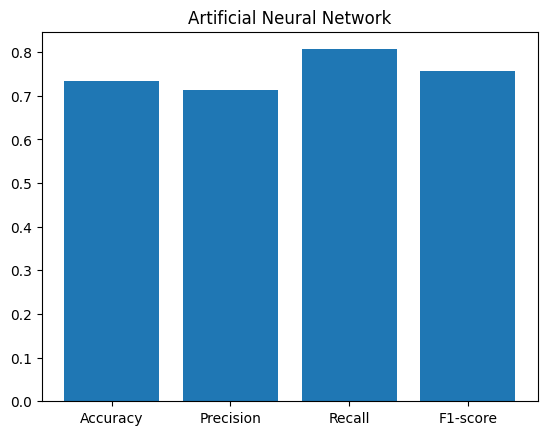

In [13]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1, roc])
    print(f"\n{name} Performance:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("ROC AUC:", roc)
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    x=["Accuracy","Precision","Recall","F1-score"]
    y=[acc,prec,rec,f1]
    plt.bar(x,y)
    plt.title(name)
    plt.show()


## 7.Model Comparison

In [14]:
# Model Comparison Table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
print("\nModel Comparison:\n", results_df)



Model Comparison:
                        Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.716667   0.718750  0.741935  0.730159   
1     Support Vector Machine  0.716667   0.705882  0.774194  0.738462   
2              Random Forest  0.700000   0.724138  0.677419  0.700000   
3                    XGBoost  0.683333   0.687500  0.709677  0.698413   
4                        KNN  0.633333   0.666667  0.580645  0.620690   
5              Decision Tree  0.583333   0.607143  0.548387  0.576271   
6               Naive Baye's  0.533333   0.528302  0.903226  0.666667   
7  Artificial Neural Network  0.733333   0.714286  0.806452  0.757576   

    ROC AUC  
0  0.715795  
1  0.714683  
2  0.700779  
3  0.682425  
4  0.635150  
5  0.584538  
6  0.520578  
7  0.730812  


## 8.Model Comparison For Datset1 And Dataset2

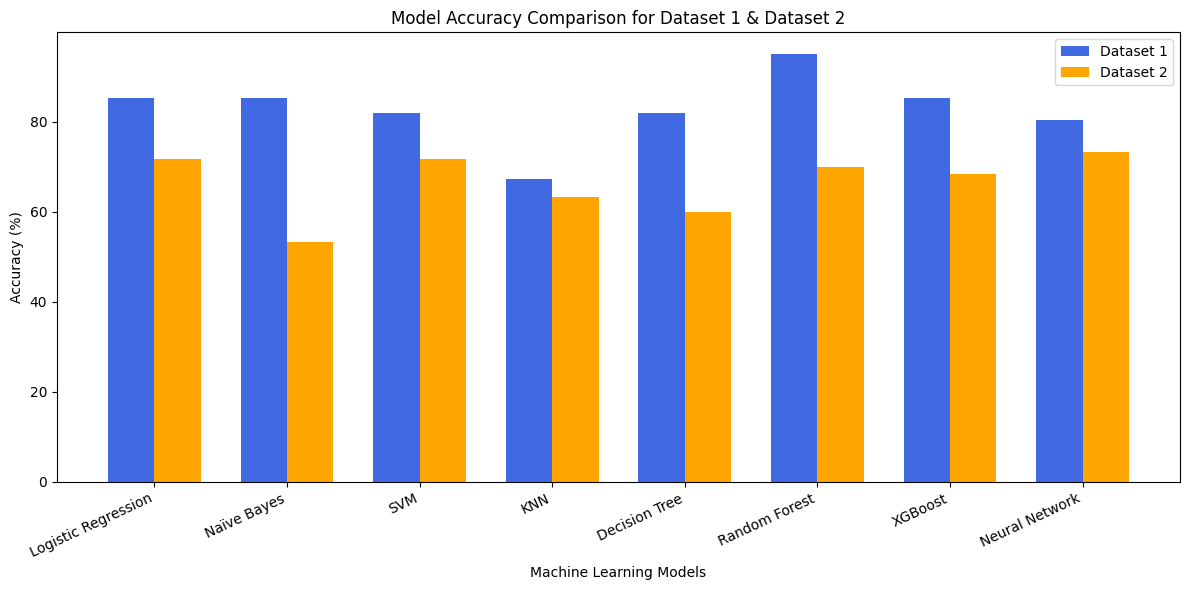

In [15]:
# Model Comparison
models = ["Logistic Regression", "Naïve Bayes", "SVM", "KNN", "Decision Tree", 
          "Random Forest", "XGBoost", "Neural Network"]

# Accuracy values for Dataset 1 and Dataset 2
accuracy_dataset1 = [85.25, 85.25, 81.97, 67.21, 81.97, 95.08, 85.25, 80.33]
accuracy_dataset2 = [71.66, 53.33, 71.66, 63.33, 60, 70, 68.33, 73.33]

# X-axis positions
x = np.arange(len(models))

# Bar width
width = 0.35

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, accuracy_dataset1, width, label="Dataset 1", color="royalblue")
bars2 = ax.bar(x + width/2, accuracy_dataset2, width, label="Dataset 2", color="orange")

# Labels and title
ax.set_xlabel("Machine Learning Models")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Model Accuracy Comparison for Dataset 1 & Dataset 2")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, ha="right")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

## 9.Hyperparameter Tuning 

In [16]:
#  Hyperparameter Tuning (Random Forest)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [17]:
# Best parameters
print("Best RF Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_pca)
print("Best RF Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Best RF Parameters: {'max_depth': 10, 'n_estimators': 100}
Best RF Accuracy: 0.7166666666666667


## 10.Save The Model

In [18]:
# Save the Best Model
joblib.dump(best_rf, "best_model_300.pkl")
joblib.dump(scaler, "scaler_300.pkl")
joblib.dump(pca, "pca_300.pkl")


['pca_300.pkl']